# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import libraries and packages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

* To discover the data and know the types
* We want clean, high-quality, error free data or the analysis will be bad
* We want to use describe() method to check the mean, median, standard deviation, min/max, quartiles, etc.
* To plot the relationship between independent and dependent variables to visualize their linear relationship

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

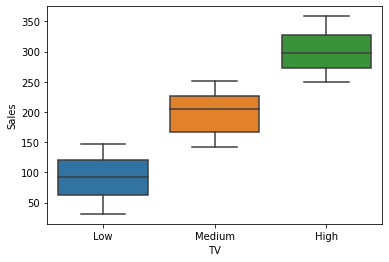

In [3]:
# Create a boxplot with TV and Sales.

sns.boxplot(x=data['TV'], y=data['Sales'])
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

Yes, there is variation in Sales based off TV promotion tiers. We can use ANOVA to see the differences because TV is categorical and has 3 or more groups (High, Medium, and Low).

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

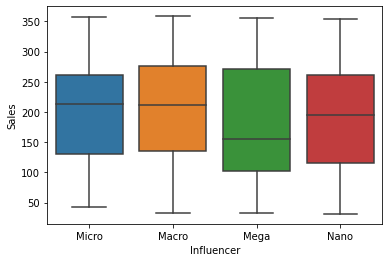

In [4]:
# Create a boxplot with Influencer and Sales.

sns.boxplot(x=data['Influencer'], y=data['Sales'])
plt.show()

**Question:** Is there variation in `Sales` based off the `Influencer` size?

There is slight variation, but not as large as TV and its groups.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [5]:
# Drop rows that contain missing data and update the DataFrame.

print('Number of rows with missing data: ', data.isna().any(axis=1).sum())
print()
print('Rows with missing data:')
print(data[data.isna().any(axis=1)])

data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

print()

# Confirm the data contains no missing values.

print('Confirmation of clean data:')
data.isna().sum(axis=0)

Number of rows with missing data:  3

Rows with missing data:
       TV      Radio  Social Media Influencer       Sales
232   NaN  34.111674      4.624148       Nano  342.913372
443  High  36.466753      5.635992       Mega         NaN
510   Low        NaN      4.132526      Macro   78.031498

Confirmation of clean data:


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [6]:
# Define the OLS formula.

ols_formula = 'Sales ~ C(TV)'


# Create an OLS model.
# Fit the model.

model = ols(formula=ols_formula, data=data).fit()


# Save the results summary.

model_results = model.summary()


# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          8.81e-256
Time:                        15:33:25   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

TV was chosen because it showed a stronger relationship with Sales than Influencer with Sales.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

The model (with TV) is categorical and not numerical, thus linearity assumption is not required.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

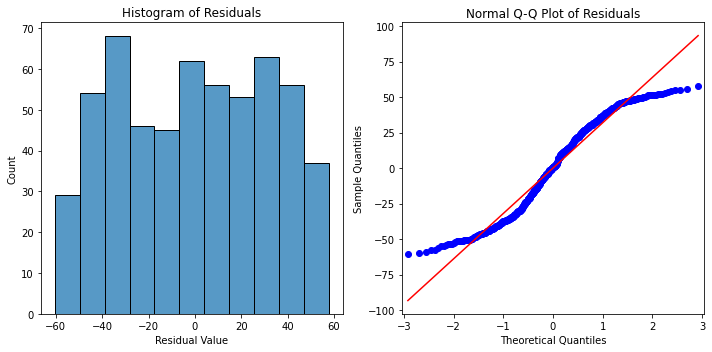

In [7]:
# Calculate the residuals.

residuals = model.resid

fix, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residual Value')

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Normal Q-Q Plot of Residuals')


plt.tight_layout()
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

The normality might not be met because the histogram is not quite normally distributed when TV is chosen as an independent variable. Also, the Q-Q plot doesn't follow the entire line but rather forms a slight 'S' shape.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

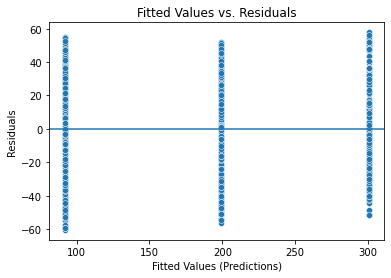

In [8]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)

fig.set_title('Fitted Values vs. Residuals')
fig.set_xlabel('Fitted Values (Predictions)')
fig.set_ylabel('Residuals')

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

The variance where there are fitted values among the 3 groups look similarly distributed, thus meeting the constant variance (homoscedasticity) assumption.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [9]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          8.81e-256
Time:                        15:33:25   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

The R<sup>2</sup> for TV as independent and Sales as dependent variabls is 0.874.
TV explains 87.4% of the variation in Sales.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The default TV category for the model is High because we see Low and Medium in the summary table. According to the model, TV <sub>Low</sub> is \\$208.8133 lower in Sales than TV<sub>High</sub> and TV<sub>Medium</sub> is \\$101.5061 lower in Sales than TV <sub>High</sub>.

The coefficients are statistically significant because both TV Low and TV Medium have p-value of 0.00 (0%), which are lower than the significance level of 0.05 (5%).

- There is a 95% probability the interval [-215.353, -202.274] contains the true parameter of Slope<sub>TV Low</sub>.
- There is a 95% probability the interval [-108.038, -94.975] contains the true parameter of slope<sub>TV Medium</sub>.

**Question:** Do you think your model could be improved? Why or why not? How?

The model can be improved if we had numerical values for each tier of the TV category.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [10]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


In [11]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


In [12]:
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,1.589597e+07,1.0,15465.378887,0.000000e+00
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

Null hypothesis: There is no difference in Sales based on different TV budgets.

Alternative hypothesis: There is a difference in Sales based on different TV budgets.

**Question:** What is your conclusion from the one-way ANOVA test?

The F-statistic is 1971.455737 and the p-value is 8.805550e-256 (really small). Since the p-value is less than the significant level of 0.05, we reject the null hypothesis in favor of the alternative hypothesis.

**Question:** What did the ANOVA test tell you?

The one-way ANOVA test showed that there is a statistically significant difference in Sales for the TV tiers.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [13]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog=data['Sales'], groups=data['TV'], alpha=0.05)

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

For the groupings of (TV<sub>High</sub> and TV<sub>Low</sub>), (TV<sub>High</sub> and TV<sub>Medium</sub>), and (TV<sub>Low</sub> and TV<sub>Medium</sub>) we reject the null hypothesis in favor of the alternative hypothesis because all their p-values are 0.001, which are lower than the significant level of 0.05.

**Question:** What did the post hoc tell you?**

The post hoc test showed which combination of pairs in the TV tier were statiscally significant and how they differ from one pair to another. A one-way ANOVA test might show there is significance, but it doesn't provide pair-wise detail like the post hoc.

The meandiff shows that:
- going from High to Low, there is a decrease of \\$208.8133
- going from High to Medium, there is a decrease of \\$101.5061
- going from Low to Medium, there is an increase of \\$107.3072

Because the p-value for all pair-wise results were 0.0, which are lower than the significance level of 0.05, the 3 null hypotheses were all rejected in favor of the 3 alternative hypotheses.

We are:
- 95% confident that the true mean value going from TV<sub>High</sub> to TV<sub>Low</sub> is within [-216.637, -200.9896]
- 95% confident that the true mean value going from TV<sub>High</sub> to TV<sub>Medium</sub> is within [-109.3204, -93.6918]
- 95% confident that the true mean value going from TV<sub>Low</sub> to TV<sub>Medium</sub> is within [99.7063, 114.908]

## **Considerations**

**What are some key takeaways that you learned during this lab?**

- Box-plots are used to visualize the distribution of a variable across groups/tiers.
- One-way ANOVA is used to determine if there are significant differences among the means of 3 or more groups.
- ANOVA post hoc tests shows detailed pair-wise differences between the different combinations.


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

Budgeting into TV<sub>High</sub> resulted in the greatest Sales return than TV<sub>Medium</sub> or TV<sub>Low</sub>.

R<sup>2</sup> for the linear regression model estimates that TV accounts for 87.4% of the variation in Sales.

The one-way ANOVA test resulted in:
- rejecting the null hypothesis where
    - H<sub>0</sub>: There is no difference in Sales based on different TV budgets
- in favor of the alternative hypothesis where
    - H<sub>1</sub>: There is a difference in Sales based on different TV budgets

Using Tukey's HSD test in the post hoc, we found that:

- going from TV<sub>High</sub> to TV<sub>Low</sub>, there is a decrease of \\$208.8133M
    - 95% confident that the true mean value going from TV<sub>High</sub> to TV<sub>Low</sub> is between -\\$216.637M and -\\$200.9896M.
- going from TV<sub>High</sub> to TV<sub>Medium</sub>, there is a decrease of \\$101.5061M
    - 95% confident that the true mean value going from TV<sub>High</sub> to TV<sub>Medium</sub> is between -\\$109.3204M and -\\$93.6918M.
- going from TV<sub>Low</sub> to TV<sub>Medium</sub>, there is an increase of \\$107.3072M
    - 95% confident that the true mean value going from TV<sub>Low</sub> to TV<sub>Medium</sub> is between \\$99.7063M and \\$114.908M.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.